In [3]:
pip install umap-learn

  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.12-py3-none-any.whl.metadata (6.8 kB)
Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
Using cached pynndescent-0.5.12-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install datashader

  Using cached datashader-0.16.2-py2.py3-none-any.whl.metadata (13 kB)
  Using cached colorcet-3.1.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached param-2.1.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached pyct-0.5.0-py2.py3-none-any.whl.metadata (7.4 kB)
  Using cached xarray-2024.5.0-py3-none-any.whl.metadata (11 kB)
Using cached datashader-0.16.2-py2.py3-none-any.whl (18.3 MB)
Using cached colorcet-3.1.0-py3-none-any.whl (260 kB)
Using cached multipledispatch-1.0.0-py3-none-any.whl (12 kB)
Using cached param-2.1.0-py3-none-any.whl (116 kB)
Using cached pyct-0.5.0-py2.py3-none-any.whl (15 kB)
Using cached xarray-2024.5.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install numba

In [6]:
!pip install bokeh

In [7]:
!pip install polars

  Using cached polars-0.20.31-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached polars-0.20.31-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (28.8 MB)


In [8]:
!pip install "holoviews[recommended]"

  Using cached holoviews-1.18.3-py2.py3-none-any.whl.metadata (21 kB)
  Using cached pyviz_comms-3.0.2-py3-none-any.whl.metadata (7.7 kB)
  Using cached panel-1.4.4-py3-none-any.whl.metadata (25 kB)
  Using cached bokeh-3.4.1-py3-none-any.whl.metadata (12 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached linkify_it_py-2.0.3-py3-none-any.whl.metadata (8.5 kB)
  Using cached mdit_py_plugins-0.4.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached uc_micro_py-1.0.3-py3-none-any.whl.metadata (2.0 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached panel-1.4.4-py3-none-any.whl (24.7 MB)
Using cached bokeh-3.4.1-py3-none-any.whl (7.0 MB)
Using cached pyviz_comms-3.0.2-py3-none-any.whl (83 kB)
Using cached holoviews-1.18.3-py2.py3-none-any.whl (4.3 MB)
Using cached linkify_it_py-2.0.3-py3-none-any.whl (19 kB)
Using cached Markdown-3.6-py3-none-any.whl (105 kB)
Using

In [9]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from os.path import join as pjoin
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.lines import Line2D
from umap import UMAP
import umap
import umap.plot
import copy
import polars as pl
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF
import pickle

In [10]:
# Lee el archivo TSV
df_polar = pl.read_csv("~/shared/CAMDA2024/Camda24_resistance/DataSets/PangenomeCountCiprofloxacin.tsv", separator='\t')

# Muestra el DataFrame
df_polar

accession,genus,species,antibiotic,phenotype,measurement_value,ERR2044062_CDS_4717,ERR2044062_CDS_4845,ERR2044062_CDS_5037,ERR2044062_CDS_5581,ERR2044062_CDS_5677,ERR2044062_CDS_5741,ERR2044062_CDS_5837,ERR2060042_CDS_5277,ERR2060042_CDS_5309,ERR2060054_CDS_3426,ERR2060054_CDS_4258,ERR2060054_CDS_4386,ERR2060054_CDS_4834,ERR2060054_CDS_5314,ERR2060069_CDS_4083,ERR2060089_CDS_4054,ERR2060089_CDS_4246,ERR2060089_CDS_4406,ERR2060095_CDS_0500,ERR349962_CDS_2499,ERR352722_CDS_2561,ERR449460_CDS_2640,SRR10257458_CDS_1510,SRR10257459_CDS_0682,SRR10257459_CDS_0778,SRR10257459_CDS_0874,SRR10257459_CDS_1066,SRR10257459_CDS_1866,SRR10257519_CDS_0268,SRR10257519_CDS_1740,SRR1752844_CDS_4825,…,SRR4420895_CDS_4835,DRR148171_CDS_1233,DRR148171_CDS_2769,DRR148274_CDS_5026,DRR148300_CDS_5388,DRR148331_CDS_3778,DRR148331_CDS_4322,DRR148331_CDS_4514,DRR148331_CDS_4962,DRR148333_CDS_0444,ERR1995431_CDS_3873,ERR1995431_CDS_4609,ERR1995442_CDS_0900,ERR2044118_CDS_5137,ERR2044118_CDS_5617,ERR2044118_CDS_5713,ERR2044126_CDS_0104,ERR2044126_CDS_0200,SRR10257457_CDS_0542,SRR10257495_CDS_0731,SRR10257495_CDS_1755,SRR10257495_CDS_1883,SRR1300638_CDS_4645,SRR1557002_CDS_4631,SRR1910773_CDS_4859,SRR1910773_CDS_4923,SRR1910773_CDS_4955,SRR2239579_CDS_2505,SRR2239579_CDS_2633,SRR2239600_CDS_3411,SRR3056915_CDS_5005,SRR3271894_CDS_0070,SRR3295785_CDS_4561,SRR3295803_CDS_0359,SRR4025989_CDS_3336,SRR4025989_CDS_4488,SRR4025989_CDS_4776
str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SRR3138666""","""Campylobacter""","""jejuni""","""ciprofloxacin""","""Susceptible""",0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""SRR3138667""","""Campylobacter""","""jejuni""","""ciprofloxacin""","""Susceptible""",0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""SRR3138668""","""Campylobacter""","""jejuni""","""ciprofloxacin""","""Susceptible""",0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""SRR3138669""","""Campylobacter""","""jejuni""","""ciprofloxacin""","""Susceptible""",0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""SRR3138670""","""Campylobacter""","""jejuni""","""ciprofloxacin""","""Susceptible""",0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""SRR3242343""","""Salmonella""","""enterica""","""ciprofloxacin""",null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [31]:
def get_tfidf(data):
    vectorizer = TfidfTransformer()
    X = vectorizer.fit_transform(data)
    tfidf = X.toarray()

    return tfidf

In [32]:
df = df_polar

# Crear las columnas individuales
df = df.with_columns([
    pl.col("genus").str.slice(0, 2).alias("genus_code"),
    pl.col("species").str.slice(0, 1).alias("species_code"),
    pl.col("phenotype").str.slice(0, 1).alias("phenotype_code"),
    pl.col("antibiotic").str.slice(0, 1).alias("antibiotic_code")
])

# Concatenar las columnas individuales en una sola columna "code"
df = df.with_columns([
    pl.concat_str(["genus_code", "species_code", "phenotype_code", "antibiotic_code"]).alias("code")
])

# Seleccionar las columnas deseadas
df_code = df.select(pl.exclude(["genus_code", "species_code", "phenotype_code", "antibiotic_code"]))

# Mostrar el DataFrame resultante
print(df_code)

shape: (3_881, 79_182)
┌────────────┬────────────┬──────────┬────────────┬───┬────────────┬───────────┬───────────┬───────┐
│ accession  ┆ genus      ┆ species  ┆ antibiotic ┆ … ┆ SRR4025989 ┆ SRR402598 ┆ SRR402598 ┆ code  │
│ ---        ┆ ---        ┆ ---      ┆ ---        ┆   ┆ _CDS_3336  ┆ 9_CDS_448 ┆ 9_CDS_477 ┆ ---   │
│ str        ┆ str        ┆ str      ┆ str        ┆   ┆ ---        ┆ 8         ┆ 6         ┆ str   │
│            ┆            ┆          ┆            ┆   ┆ f64        ┆ ---       ┆ ---       ┆       │
│            ┆            ┆          ┆            ┆   ┆            ┆ f64       ┆ f64       ┆       │
╞════════════╪════════════╪══════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════╡
│ SRR3138666 ┆ Campylobac ┆ jejuni   ┆ ciprofloxa ┆ … ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ CajSc │
│            ┆ ter        ┆          ┆ cin        ┆   ┆            ┆           ┆           ┆       │
│ SRR3138667 ┆ Campylobac ┆ jejuni   ┆ ciprofloxa ┆ … ┆ 0.0        ┆

In [33]:
df_code['code'].unique()

code
str
null
"""CajSc"""
"""NegRc"""
"""SaeRc"""
"""SaeSc"""
"""NegSc"""
"""CajRc"""


In [ ]:
# Obtener el nombre de las primeras 7 columnas de df
primeras_7_columnas = df.columns[:7]

# Imprimir el nombre de las primeras 7 columnas
print("Nombre de las primeras 7 columnas:")
for columna in primeras_7_columnas:
    print(columna)

In [35]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df_code.filter(pl.col('phenotype').is_in(['Susceptible', 'Resistant']))
df_test = df_code.filter(pl.col('phenotype').is_null())

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.select(pl.exclude(['code', 'accession', 'genus', 'species', 'antibiotic', "phenotype","measurement_value"]))
df_filtrado_test = df_test.select(pl.exclude(['code', 'accession', 'genus', 'species', 'antibiotic', "phenotype","measurement_value"]))

labels = df_training['code']
label_encoder = LabelEncoder()
# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels.to_numpy())

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado.to_numpy(), encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

# Directorio de salida para guardar los resultados y predicciones

output_folder = "output_results"
os.makedirs(output_folder, exist_ok=True)

trans = umap.UMAP(n_neighbors=10, n_components=3, min_dist=0.5, metric='cosine', random_state=42).fit(X_train)

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
}

results = {}
test_embedding = trans.transform(X_test)

for algo_name, algo in algorithms.items():
    # Train the model
    algo.fit(trans.embedding_, y_train)
    
    # Make predictions on the test set
    y_pred = algo.predict(test_embedding)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': cm}
    
    # Plot and save confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {algo_name}')
    plt.savefig(os.path.join(output_folder, algo_name + "_confusion_matrix.png"))
    plt.close()
    
    # Realiza predicciones en df_test
    tests_embedding = trans.transform(df_filtrado_test.to_numpy())
    test_predictions = algo.predict(tests_embedding)
    
    # Guarda las predicciones en un archivo CSV
    test_predictions_labels = label_encoder.inverse_transform(test_predictions)
    test_predictions_df = pl.DataFrame({
        'genus': df_test['genus'],
        'species': df_test['species'],
        'accession': df_test['accession'],
        'antibiotic': df_test['antibiotic'],
        'status': test_predictions_labels
    })
    test_predictions_df.write_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), has_header=True)


/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/tmp/ipykernel_92/3778642955.py:74: DeprecationWarning: The argument `has_header` for `write_csv` is deprecated. It has been renamed to `include_header`.
  test_predictions_df.write_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), has_header=True)
/tmp/ipykernel_92/3778642955.py:74: DeprecationWarning: The argument `has_header` for `write_csv` is deprecated. It has been renamed to `include_header`.
  test_predictions_df.write_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), has_header=True)
/tmp/ipykernel_92/3778642955.py:74: DeprecationWarning: The argument `has_header` for `write_csv` is deprecated. It has been renamed to `include_header`.
  test_predictions_df.write_csv(os.path.jo

PanicException: called `Option::unwrap()` on a `None` value

In [38]:
# Guarda los resultados generales en un CSV
results_df_test = pd.DataFrame(results).transpose()
results_df_test.to_csv(os.path.join(output_folder, "overall_results.csv"))

**Para hacer el plot**

In [39]:
# Rellenar valores NaN en la columna 'code'
df_code = df_code.with_columns(pl.col('code').fill_null('Target'))
df_code.tail()

accession,genus,species,antibiotic,phenotype,measurement_value,ERR2044062_CDS_4717,ERR2044062_CDS_4845,ERR2044062_CDS_5037,ERR2044062_CDS_5581,ERR2044062_CDS_5677,ERR2044062_CDS_5741,ERR2044062_CDS_5837,ERR2060042_CDS_5277,ERR2060042_CDS_5309,ERR2060054_CDS_3426,ERR2060054_CDS_4258,ERR2060054_CDS_4386,ERR2060054_CDS_4834,ERR2060054_CDS_5314,ERR2060069_CDS_4083,ERR2060089_CDS_4054,ERR2060089_CDS_4246,ERR2060089_CDS_4406,ERR2060095_CDS_0500,ERR349962_CDS_2499,ERR352722_CDS_2561,ERR449460_CDS_2640,SRR10257458_CDS_1510,SRR10257459_CDS_0682,SRR10257459_CDS_0778,SRR10257459_CDS_0874,SRR10257459_CDS_1066,SRR10257459_CDS_1866,SRR10257519_CDS_0268,SRR10257519_CDS_1740,SRR1752844_CDS_4825,…,DRR148171_CDS_1233,DRR148171_CDS_2769,DRR148274_CDS_5026,DRR148300_CDS_5388,DRR148331_CDS_3778,DRR148331_CDS_4322,DRR148331_CDS_4514,DRR148331_CDS_4962,DRR148333_CDS_0444,ERR1995431_CDS_3873,ERR1995431_CDS_4609,ERR1995442_CDS_0900,ERR2044118_CDS_5137,ERR2044118_CDS_5617,ERR2044118_CDS_5713,ERR2044126_CDS_0104,ERR2044126_CDS_0200,SRR10257457_CDS_0542,SRR10257495_CDS_0731,SRR10257495_CDS_1755,SRR10257495_CDS_1883,SRR1300638_CDS_4645,SRR1557002_CDS_4631,SRR1910773_CDS_4859,SRR1910773_CDS_4923,SRR1910773_CDS_4955,SRR2239579_CDS_2505,SRR2239579_CDS_2633,SRR2239600_CDS_3411,SRR3056915_CDS_5005,SRR3271894_CDS_0070,SRR3295785_CDS_4561,SRR3295803_CDS_0359,SRR4025989_CDS_3336,SRR4025989_CDS_4488,SRR4025989_CDS_4776,code
str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""SRR3242343""","""Salmonella""","""enterica""","""ciprofloxacin""",null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Target"""
"""SRR2082856""","""Salmonella""","""enterica""","""ciprofloxacin""",null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Target"""
"""SRR3242362""","""Salmonella""","""enterica""","""ciprofloxacin""",null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Target"""
"""SRR1257300""","""Salmonella""","""enterica""","""ciprofloxacin""",null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Target"""
"""SRR4280580""","""Salmonella""","""enterica""","""ciprofloxacin""",null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Target"""


In [40]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df_code.filter(pl.col('phenotype').is_in(['Susceptible', 'Resistant']))
df_test = df_code.filter(pl.col('phenotype').is_in(['Target']))

labels = df_training['code']
label_encoder = LabelEncoder()
# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels.to_numpy())

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

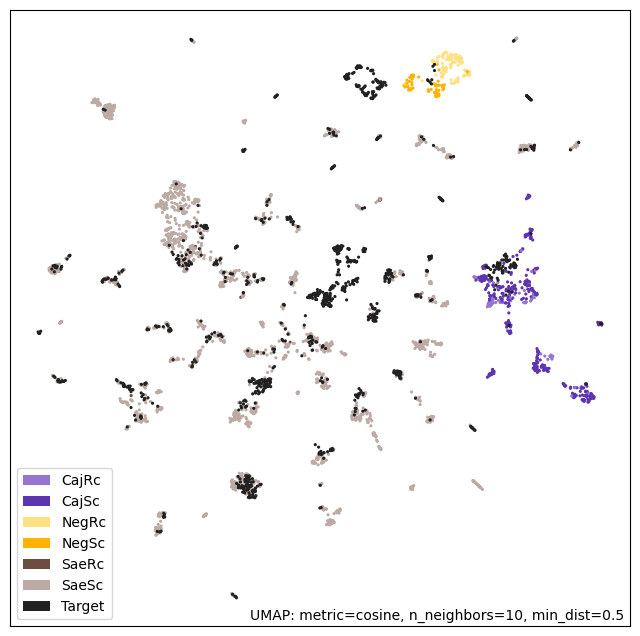

In [41]:
# Seleccionar solo las columnas numéricas para UMAP
numeric_columns = df_code.select(pl.col(pl.Float64))

# Imputar los valores NaN con cero
numeric_columns = numeric_columns.fill_null(0.0)

# Aplicar UMAP a las columnas numéricas
reducer = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.5, metric='cosine', random_state=42).fit(numeric_columns.to_numpy())

color_mapping = {
    'AcbRm': "#E91E63",
    'AcbSm': "#F48FB1",
    'CajSc': "#5E35B1",
    'CajRc': "#9575CD",
    'EncSm': "#1E88E5",
    'EncRm': "#90CAF9",
    'EscRm': "#00897B",
    'EscSm': "#4DB6AC",
    'KlpRm': "#7CB342",
    'KlpSm': "#C8E6C9",
    'NegSc': "#FFB300",
    'NegRc': "#FFE082",
    'PsaSm': "#F4511E",
    'PsaRm': "#FFAB91",
    'SaeRc': "#6D4C41",
    'SaeSc': "#BCAAA4",
    'Target': "#212121"
}

umap.plot.points(reducer, labels=df_code['code'].to_numpy(), color_key=color_mapping)

**Solo con etiqueta de phenotype**
Tarda demasiado porque es con una lista de muchos parámetros a probar

In [43]:
# Directorio de salida para guardar los resultados y predicciones
output_folder = "output_results2"
os.makedirs(output_folder, exist_ok=True)

# Listas de parámetros para UMAP
n_neighbors_list = [5, 10, 20, 25, 50]
min_dists_list = [0.1, 0.2, 0.5, 0.8]

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42, probability=True),
}

results = {}
